In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import seaborn as sns
sns.set()

In [23]:
df=sm.datasets.fair.load_pandas().data
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [29]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [31]:
#checking NULL values
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

C:\Users\Saad Khattak\Anaconda3_\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saad Khattak\Anaconda3_\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saad Khattak\Anaconda3_\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

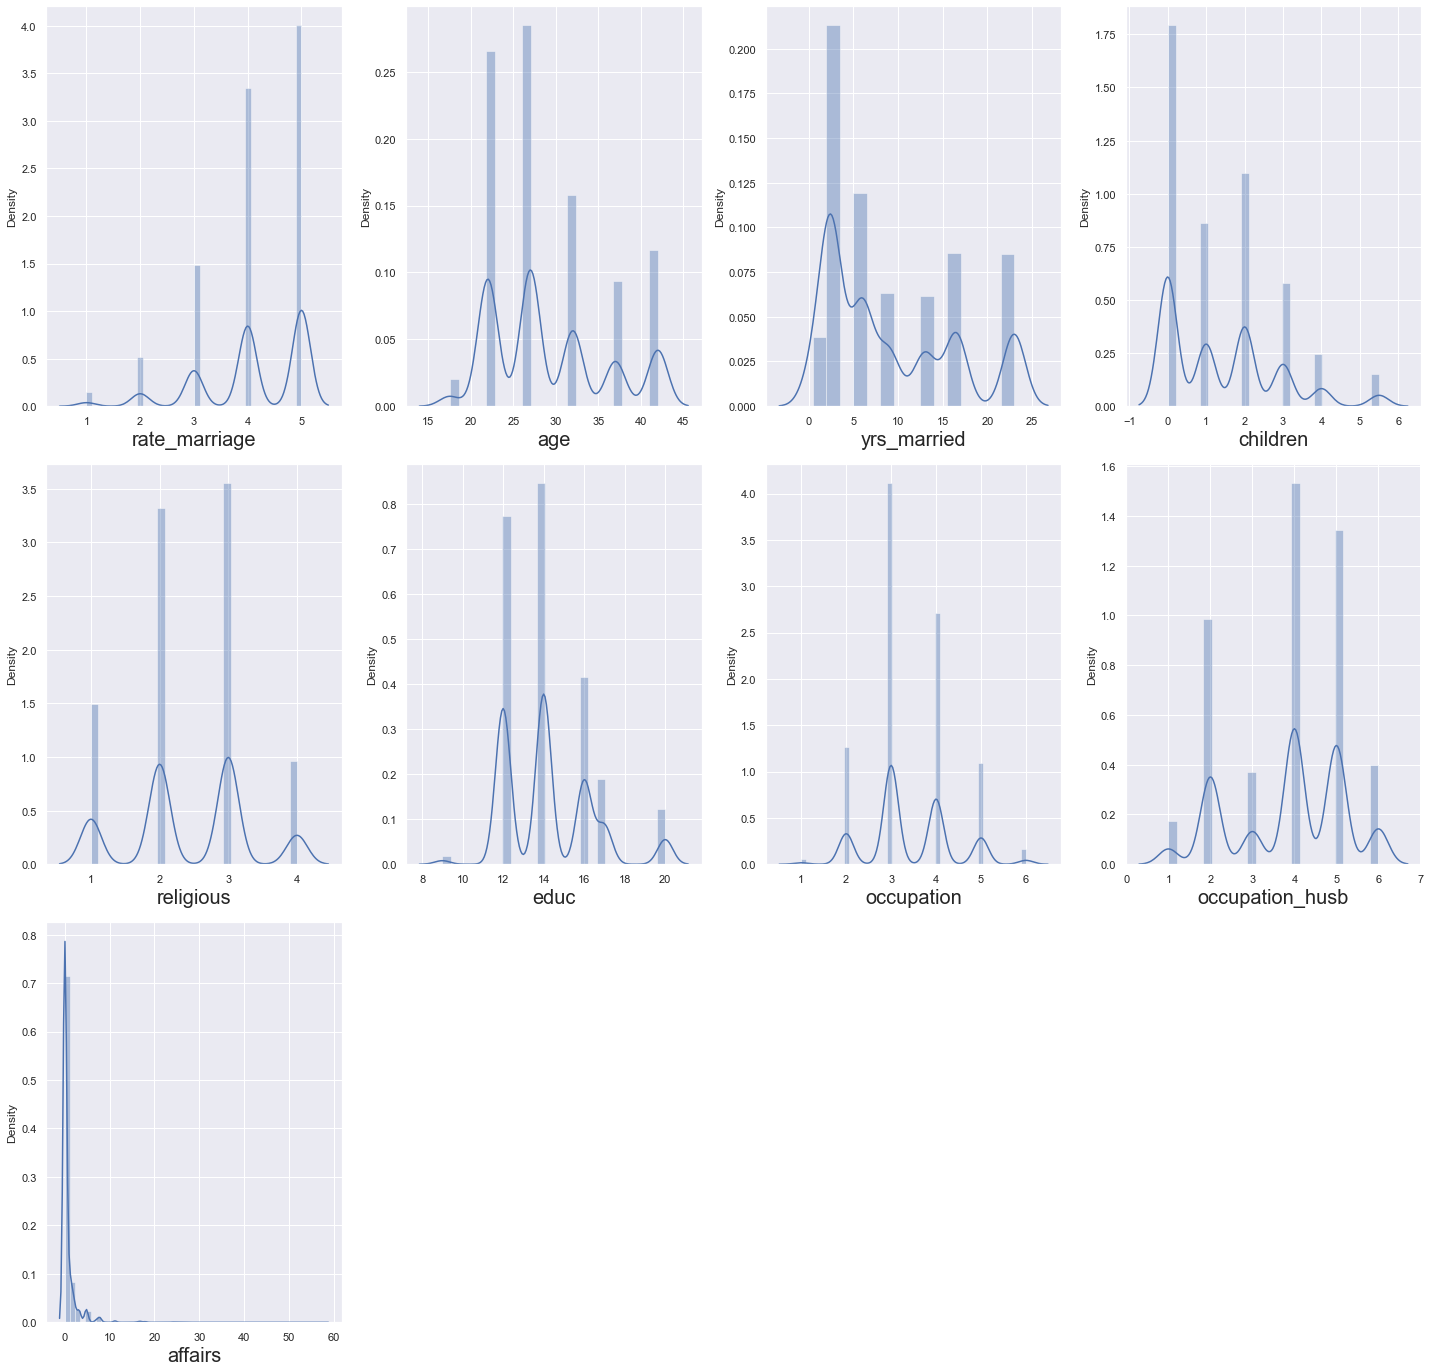

In [34]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [36]:
df['affair'] = (df_.affairs >0).astype(int)

In [37]:
df.head(20)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [38]:
#checking values counts of Affair
df['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [40]:
#Dropping the existing affair column with Float data type
df.drop('affairs',axis=1,inplace=True)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [41]:
# Making Independent and dependent variables
X=df.drop('affair',axis=True)
Y=df['affair']

In [43]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [45]:
# Standardizing independent variables
from sklearn.preprocessing import StandardScaler

Scaler= StandardScaler()
X_scaled=Scaler.fit_transform(X)

In [48]:
# Checking Multicolinerity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [49]:
vif

,VIF,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


Age and Years of marriage have high variance inflation factor. They have high multi collinearity. As a rule of thumb, these columns should be avoided. But in reality, when a wife cheats, age and years of marriage do take into account. So I wont be dropping these columns

In [47]:
scaled_x_df= pd.DataFrame(data=X_scaled, columns=X.columns)
scaled_x_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153,-1.511292,0.854069
1,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364,-0.450087,0.111309
2,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981,-0.450087,0.854069
3,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981,1.672324,0.854069
4,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364,-0.450087,0.111309


In [50]:
## Splitting Data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x_df,Y, test_size= 0.25, random_state = 42)

In [51]:
log_reg = LogisticRegression()

log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [53]:
ypred = log_reg.predict(xtest)

In [55]:
accuracy = accuracy_score(ytest,ypred)
accuracy

0.7160804020100503

In [57]:
# Confusion Matrix
conf_mat = confusion_matrix(ytest,ypred)
conf_mat

array([[946, 109],
       [343, 194]], dtype=int64)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1055
           1       0.64      0.36      0.46       537

    accuracy                           0.72      1592
   macro avg       0.69      0.63      0.63      1592
weighted avg       0.70      0.72      0.69      1592



In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [61]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8966824644549763

In [62]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7339022498060512

In [63]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8071672354948807

In [64]:
# Area Under Curve
auc = roc_auc_score(ytest, ypred)
auc

0.6289743793410822

## ROC

In [65]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)

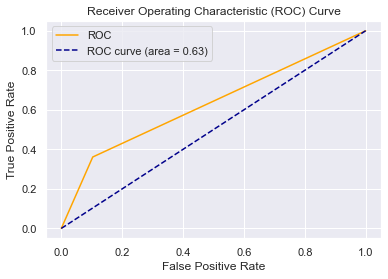

In [66]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()